In [1]:
from netCDF4 import Dataset
import rasterio
import os
from datetime import datetime
import numpy as np
from os.path import join


In [2]:
# local libraries
from coupling_PCR_FM.model_functions_v2 import PCR_model, CMF_model, DFM_model
from coupling_PCR_FM.utils import config_to_dict, determineSteps
%config Application.log_level="INFO"

In [3]:
# IMPORT MODEL SETTINGS FROM INI-FILE
argv1 = r'default_rename.set'
argv2 = r'paths.env'

# parse set/ini-file with central/general settings for coupling framework
config = config_to_dict(argv1)
# parse env-file for user-specific paths and environmental variables
envs = config_to_dict(argv2)
# combine
config.update(envs)
options = config
# parse dates
start_date = datetime.strptime(options['numerical_settings']['startTime'], '%Y-%m-%d')
end_date = datetime.strptime(options['numerical_settings']['endTime'], '%Y-%m-%d')
print start_date
print end_date
timeSteps = determineSteps(start_date, end_date)
print timeSteps

2000-01-01 00:00:00
2002-12-31 00:00:00
1095


In [4]:
# setup output dir
cwd = os.getcwd() # note: this get changed by pcr initialization later on
out_dir = options['PCRpaths']['outputDirectoryPCR']
out_dir = out_dir + 'CMF_alone/'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
print(out_dir)
print(cwd)

/home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/
/home/ikeuchi/Share/GLOFRIM/glofrim


## create CMF model BMi object

In [5]:
CMF_engine = os.path.join(cwd, options['CMF_engine']['CMF_path'])
CMF_model_dir = os.path.join(cwd, options['routing_model']['model_dir'])
CMF_config_fn = os.path.join(CMF_model_dir, options['routing_model']['model_file'])
CMF_out_dir = os.path.join(out_dir, 'CMF')
     
CMF_bmi = CMF_model(CMF_engine, CMF_config_fn, CMF_model_dir, CMF_out_dir,
                         start_date, end_date)

2018-03-16 13:41:44,127 - INFO - Loading library from path /home/ikeuchi/Share/GLOFRIM/glofrim/cama-flood_bmi/src/libcama.so


## initialize models

In [6]:
# initialize model at CMF_out_dir after inpmat has been set in the grid_to_grid coupling function.
CMF_bmi.initialize()

2018-03-16 13:41:44,351 - INFO - Ini file for CMF written to /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF/input_flood.nam
2018-03-16 13:41:44,355 - INFO - Loading model /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF/input_flood.nam in directory /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF
2018-03-16 13:41:44,377 - INFO - CMF initialized


## run coupled PCR - CMF model

2018-03-16 13:41:44,643 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-02 00:00:00, timestep 86400.0
2018-03-16 13:41:44,665 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-03 00:00:00, timestep 86400.0
2018-03-16 13:41:44,687 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-04 00:00:00, timestep 86400.0
2018-03-16 13:41:44,712 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-05 00:00:00, timestep 86400.0
2018-03-16 13:41:44,734 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-06 00:00:00, timestep 86400.0
2018-03-16 13:41:44,759 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-07 00:00:00, timestep 86400.0
2018-03-16 13:41:44,781 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-08 00:00:00, timestep 86400.0
2018-03-16 13:41:44,807 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-09 00:00:00, timestep 86400.0
2018-03-

2018-03-16 13:41:46,649 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-09 00:00:00, timestep 86400.0
2018-03-16 13:41:46,686 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-10 00:00:00, timestep 86400.0
2018-03-16 13:41:46,720 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-11 00:00:00, timestep 86400.0
2018-03-16 13:41:46,754 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-12 00:00:00, timestep 86400.0
2018-03-16 13:41:46,790 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-13 00:00:00, timestep 86400.0
2018-03-16 13:41:46,824 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-14 00:00:00, timestep 86400.0
2018-03-16 13:41:46,860 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-15 00:00:00, timestep 86400.0
2018-03-16 13:41:46,897 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-16 00:00:00, timestep 86400.0
2018-03-

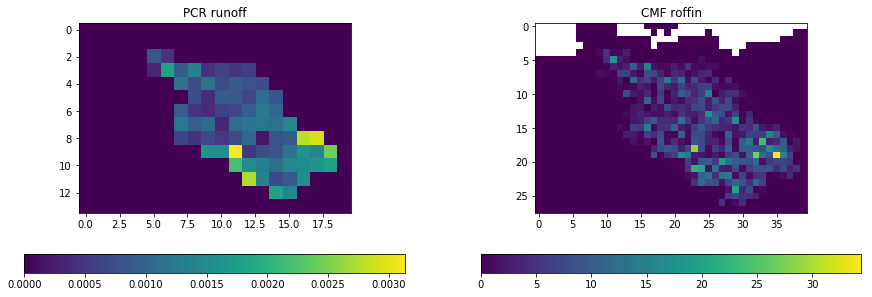

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# run coupled model for 20 timesteps
def update_states(idate):
#    "coupling runoff between CMFan PCR model"
#    runoff = PCR_bmi.get_var('landSurfaceRunoff')
#    runoff = np.where(np.isnan(runoff), 0, runoff)

    "reading from external PCR runoff output"
    date_str = idate.strftime('%Y%m%d')
    runoff = np.copy(np.fromfile(join(cwd, 'sample_runoff/PCR/Roff____{}.one'.format(date_str)), 'f').reshape(14, 20))
    runoff = np.where(runoff > 1.e19, 0, runoff)
    CMF_bmi.set_var("roffin", runoff)
    return runoff

import datetime
#for i in range(timeSteps):
for i in range(100):
    idate = start_date + datetime.timedelta(i)
#    PCR_bmi.update()
    runoff = update_states(idate)
    CMF_bmi.update()   
    
fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(runoff)
a.set_title('PCR runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,2,2)
roffin = CMF_bmi.get_var('runoff')
imgplot = plt.imshow(roffin)
a.set_title('CMF roffin')
plt.colorbar(orientation='horizontal')


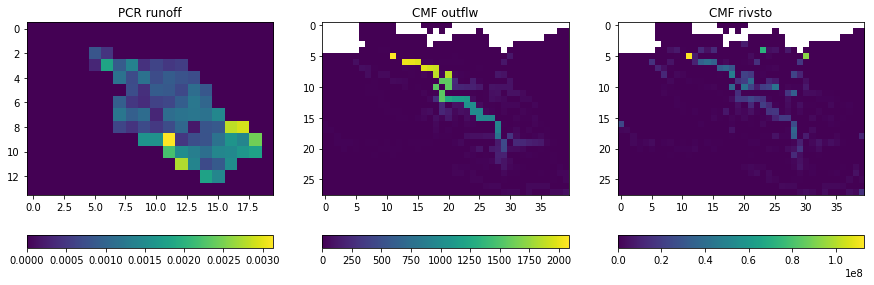

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# PCR_bmi.update()
# routingModel.update_states()
# routingModel.update() 

#runoff = PCR_bmi.get_var('landSurfaceRunoff')
outflw = CMF_bmi.get_var('outflw')
outflw = np.ma.masked_greater(outflw, 1.e19)
rivsto = CMF_bmi.get_var('rivsto_out')
rivsto = np.ma.masked_greater(rivsto, 1.e19)

fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(runoff)
a.set_title('PCR runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(outflw)
a.set_title('CMF outflw')
plt.colorbar(orientation='horizontal')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(rivsto)
a.set_title('CMF rivsto')
plt.colorbar(orientation='horizontal')

In [9]:
# finalize model
#PCR_bmi.finalize()

# finalize model
CMF_bmi.finalize()

2018-03-16 13:41:48,926 - INFO - cd /home/ikeuchi/Share/GLOFRIM/glofrim
